In [1]:
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
%cd /Users/tk324/Downloads

/Users/tk324/Downloads


In [3]:
with open('mnist_10color_jitter_var_0.020.npy', 'rb') as f:
    data = np.load(f, encoding='latin1').item()

In [5]:
len(data['test_image'])

10000

In [4]:
list(data.keys())

['test_image', 'test_label', 'test_gray', 'train_label', 'train_image']

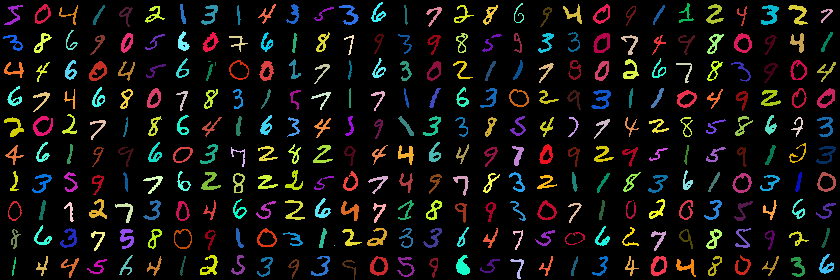

In [5]:
rows = 10
cols = 30
images = list(map(Image.fromarray, list(data['train_image'][:rows * cols])))
# make the list 2-dimensional
images = [[images[row*cols + col] for col in range(cols)] for row in range(rows)]
_, heights = zip(*(i[0].size for i in images))
_, widths = zip(*(i.size for i in images[0]))

total_width = sum(widths)
total_height = sum(heights)

new_im = Image.new('RGB', (total_width, total_height))

y_offset = 0
for ims in images:
    x_offset = 0
    for im in ims:
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[1]
    y_offset += im.size[0]
display(new_im)

In [6]:
rgbs = [[] for _ in range(10)]

imgs = data['train_image']
labels = data['train_label']

black = np.array([2, 2, 2], dtype=np.uint8)

for i in range(len(imgs)):
    # get the color by looking at the first non-black pixel
    color = imgs[i][imgs[i] > black][:3]
    rgbs[labels[i]].append(color)
rgb_arr = list(map(np.array, rgbs))

In [7]:
rgb_means = [rgb.mean(axis=0) for rgb in rgb_arr]
rgb_var = [rgb.var(axis=0) / 255 / 255 for rgb in rgb_arr]
for i, (mean, var) in enumerate(zip(rgb_means, rgb_var)):
    print(f'digit: {i}')
    print(mean)
    print(var)
    print("")
# rgb_means, rgb_var

digit: 0
[214.70150262  41.8016208   79.79486747]
[0.01055442 0.0113779  0.02465445]

digit: 1
[ 34.84233165 127.87689113 127.66033818]
[0.01403678 0.02027045 0.01986266]

digit: 2
[225.27391742 211.59164149  45.26569319]
[0.00735345 0.01139419 0.021623  ]

digit: 3
[ 34.59484587 133.0856304  191.17077149]
[0.0131388  0.02255258 0.01876194]

digit: 4
[221.56761383 128.69736392  56.98493667]
[0.00867546 0.02012449 0.01930949]

digit: 5
[143.67552112  46.69433684 183.89061059]
[0.01973037 0.01716253 0.01745634]

digit: 6
[ 73.00219669 219.81345049 219.05576208]
[0.01854323 0.00934899 0.00939754]

digit: 7
[223.64852354 186.21835595 186.28268156]
[0.00794788 0.01680687 0.01674753]

digit: 8
[201.84669287 221.74089899  65.34199282]
[0.01396384 0.00872777 0.01841317]

digit: 9
[127.96369138  30.49571357  39.47184401]
[0.02011062 0.00711986 0.02123456]

